#📌 Extracción

In [1]:
import pandas as pd


In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
import pandas as pd
import json
import requests

df = requests.get(url)
res = json.loads(df.text)
df_n = pd.json_normalize(res, sep=" ")
df_Telecom = pd.DataFrame(df_n)
df_Telecom = df_Telecom.drop_duplicates()
df_Telecom.head()



,customerID,Churn,customer gender,customer SeniorCitizen,customer Partner,customer Dependents,customer tenure,phone PhoneService,phone MultipleLines,internet InternetService,...,internet OnlineBackup,internet DeviceProtection,internet TechSupport,internet StreamingTV,internet StreamingMovies,account Contract,account PaperlessBilling,account PaymentMethod,account Charges Monthly,account Charges Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**Diccionario**

* customerID: número de identificación único de cada cliente.
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* Ol ineSecurity: suscripción adicional de seguridad en línea
* On ineBackup: suscripción adicional de respaldo en línea
* De iceProtection: suscripción adicional de protección del dispositivo
* Te hSupport: suscripción adicional de soporte técnico, menor tiempo de espera * treamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

#🔧 Transformación

In [3]:
df_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer gender            7267 non-null   object 
 3   customer SeniorCitizen     7267 non-null   int64  
 4   customer Partner           7267 non-null   object 
 5   customer Dependents        7267 non-null   object 
 6   customer tenure            7267 non-null   int64  
 7   phone PhoneService         7267 non-null   object 
 8   phone MultipleLines        7267 non-null   object 
 9   internet InternetService   7267 non-null   object 
 10  internet OnlineSecurity    7267 non-null   object 
 11  internet OnlineBackup      7267 non-null   object 
 12  internet DeviceProtection  7267 non-null   object 
 13  internet TechSupport       7267 non-null   objec

In [4]:
df_Telecom.dtypes

,0
customerID,object
Churn,object
customer gender,object
customer SeniorCitizen,int64
customer Partner,object
customer Dependents,object
customer tenure,int64
phone PhoneService,object
phone MultipleLines,object
internet InternetService,object


In [5]:
df_Telecom.apply(lambda x: x.astype(str).str.strip() == "").sum()

,0
customerID,0
Churn,224
customer gender,0
customer SeniorCitizen,0
customer Partner,0
customer Dependents,0
customer tenure,0
phone PhoneService,0
phone MultipleLines,0
internet InternetService,0


In [6]:
#Verificamos si hay valores únicos en cada columna
for col in df_Telecom.columns:
   print(f"valores únicos en las columnas {col}:{df_Telecom[col].nunique()}")
   if df_Telecom[col].nunique() < 50: #imprime los valores solamente si no hay muchos
    print(df_Telecom[col].unique())
    print('-'*50)


valores únicos en las columnas customerID:7267
valores únicos en las columnas Churn:3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en las columnas customer gender:2
['Female' 'Male']
--------------------------------------------------
valores únicos en las columnas customer SeniorCitizen:2
[0 1]
--------------------------------------------------
valores únicos en las columnas customer Partner:2
['Yes' 'No']
--------------------------------------------------
valores únicos en las columnas customer Dependents:2
['Yes' 'No']
--------------------------------------------------
valores únicos en las columnas customer tenure:73
valores únicos en las columnas phone PhoneService:2
['Yes' 'No']
--------------------------------------------------
valores únicos en las columnas phone MultipleLines:3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en las columnas internet InternetService:3
['DSL' 'Fiber optic' 'No'

In [7]:
#Duplicados
print(f"Cantidad de duplicados: {df_Telecom.duplicated().sum()}")

Cantidad de duplicados: 0


In [8]:
#Nulos
print(df_Telecom.isnull().sum())

customerID                   0
Churn                        0
customer gender              0
customer SeniorCitizen       0
customer Partner             0
customer Dependents          0
customer tenure              0
phone PhoneService           0
phone MultipleLines          0
internet InternetService     0
internet OnlineSecurity      0
internet OnlineBackup        0
internet DeviceProtection    0
internet TechSupport         0
internet StreamingTV         0
internet StreamingMovies     0
account Contract             0
account PaperlessBilling     0
account PaymentMethod        0
account Charges Monthly      0
account Charges Total        0
dtype: int64


In [9]:
#Vacíos o en blanco
df_Telecom.apply(lambda x: x.astype(str).str.strip() == "").sum()

,0
customerID,0
Churn,224
customer gender,0
customer SeniorCitizen,0
customer Partner,0
customer Dependents,0
customer tenure,0
phone PhoneService,0
phone MultipleLines,0
internet InternetService,0


In [10]:
#Cambiar columna 'account Charges Total' a Float
df_Telecom['account Charges Total'] = pd.to_numeric(df_Telecom['account Charges Total'], errors='coerce')
print(df_Telecom['account Charges Total'].dtype)




float64


In [11]:
#Eliminando las columndas de Churn
df_Telecom = df_Telecom[df_Telecom['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_Telecom))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [12]:
#Vacíos o en blanco
df_Telecom.apply(lambda x: x.astype(str).str.strip() == "").sum()


,0
customerID,0
Churn,0
customer gender,0
customer SeniorCitizen,0
customer Partner,0
customer Dependents,0
customer tenure,0
phone PhoneService,0
phone MultipleLines,0
internet InternetService,0


In [13]:
df_Telecom.describe()

,customer SeniorCitizen,customer tenure,account Charges Monthly,account Charges Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df_Telecom['Cuentas_Diarias'] = df_Telecom['account Charges Monthly'] / 30
print(df_Telecom[['account Charges Monthly', 'Cuentas_Diarias']].head())

   account Charges Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [15]:
df_Telecom = df_Telecom.drop('Cuentas_Diarias', errors='ignore')

In [16]:
df_Telecom

,customerID,Churn,customer gender,customer SeniorCitizen,customer Partner,customer Dependents,customer tenure,phone PhoneService,phone MultipleLines,internet InternetService,...,internet DeviceProtection,internet TechSupport,internet StreamingTV,internet StreamingMovies,account Contract,account PaperlessBilling,account PaymentMethod,account Charges Monthly,account Charges Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [17]:
import plotly.express as px


In [18]:
px.histogram(df_Telecom, x="internet InternetService", text_auto=True, color= 'Churn', barmode='group')

#📄Informe final

# 🔹 Carga y Análisis — TelecomX LATAM

> **Objetivo:** Completar la sección de *Carga y análisis* con un flujo reproducible que incluya:
>
> 1) **Análisis descriptivo** de variables numéricas (media, mediana, desviación estándar, etc.).  
> 2) **Distribución de la evasión (churn)** con gráficos.  
> 3) **Comparativa por churn** de variables numéricas (distribuciones y resúmenes).  
> 4) **Informe final** autogenerado dentro del notebook (introducción, EDA, conclusiones, recomendaciones).
>
> ⚙️ *Las celdas son autosuficientes: intentan detectar automáticamente el DataFrame principal que contenga la columna `churn`. Si no lo encuentran, verás un mensaje claro de cómo configurarlo.*

In [19]:
# === Detección y preparación del DataFrame principal ===
# Esta celda intenta encontrar el DataFrame 'df' que contenga una columna 'churn'.
# Si en tu notebook ya existe un DataFrame con churn pero con otro nombre, asigna manualmente:
#   DF = <tu_dataframe>
# y vuelve a ejecutar.

from typing import Optional, List, Tuple
import pandas as pd
import numpy as np

def _guess_candidate_dfs(glb: dict) -> List[Tuple[str, pd.DataFrame]]:
    cands = []
    for k, v in glb.items():
        if isinstance(v, pd.DataFrame):
            cands.append((k, v))
    return cands

def find_df_with_churn(glb: dict) -> Optional[pd.DataFrame]:
    # 1) Si el usuario ya definió DF, úsalo
    if 'DF' in glb and isinstance(glb['DF'], pd.DataFrame):
        if any(col.lower() == 'churn' for col in glb['DF'].columns):
            return glb['DF']
    # 2) Buscar DataFrames con columna churn (case-insensitive)
    for name, df in _guess_candidate_dfs(glb):
        lower_cols = [c.lower() for c in df.columns]
        if 'churn' in lower_cols:
            return df
    return None

# Ejecutar búsqueda
df = find_df_with_churn(globals())

if df is None:
    # Fallback opcional: intenta leer CSVs típicos si existen en el directorio
    import os, glob
    csv_candidates = []
    for pat in ["*telecom*.csv", "*telco*.csv", "*churn*.csv", "*.csv"]:
        csv_candidates.extend(glob.glob(pat))
    chosen = None
    for path in csv_candidates:
        try:
            tmp = pd.read_csv(path)
            if any(c.lower() == 'churn' for c in tmp.columns):
                df = tmp.copy()
                chosen = path
                break
        except Exception:
            pass
    if df is None:
        raise RuntimeError(
            "No se pudo detectar automáticamente el DataFrame con columna 'churn'.\n"
            "➡️ Solución rápida: asigna manualmente tu DataFrame a la variable DF y vuelve a ejecutar esta celda.\n"
            "   Ejemplo: DF = tu_dataframe\n"
            "   Requisito: Debe existir una columna 'churn' (0/1, True/False o 'Yes'/'No')."
        )
    else:
        print(f"✔️ Cargado automáticamente desde: {chosen}")

# Normalización mínima esperada:
# - Crear una versión binaria de churn: 1 = se fue, 0 = se quedó
churn_col = [c for c in df.columns if c.lower() == 'churn'][0]
df = df.copy()

def _to_binary_churn(s):
    if s.dtype == bool:
        return s.astype(int)
    if pd.api.types.is_numeric_dtype(s):
        # Asumimos 1 = churn, 0 = no churn
        return (s.astype(float) > 0.5).astype(int)
    # Cadenas comunes
    return s.astype(str).str.strip().str.lower().map({'yes':1, 'si':1, 'true':1, '1':1, 'y':1,
                                                       'no':0, 'false':0, '0':0, 'n':0}).astype(int)

df['churn_bin'] = _to_binary_churn(df[churn_col])

# Manejar valores faltantes simples en numéricas (no altera el df original salvo para análisis)
num_cols = df.select_dtypes(include=['int64','float64','int32','float32']).columns.tolist()
if 'churn_bin' in num_cols:
    num_cols.remove('churn_bin')

print(f"✅ DataFrame detectado con {df.shape[0]:,} filas y {df.shape[1]:,} columnas.")
print(f"📌 Columna de churn original: '{churn_col}'  → binaria en 'churn_bin'")
print(f"🔢 Variables numéricas detectadas ({len(num_cols)}): {num_cols[:10]}{'...' if len(num_cols)>10 else ''}")

✅ DataFrame detectado con 7,043 filas y 23 columnas.
📌 Columna de churn original: 'Churn'  → binaria en 'churn_bin'
🔢 Variables numéricas detectadas (5): ['customer SeniorCitizen', 'customer tenure', 'account Charges Monthly', 'account Charges Total', 'Cuentas_Diarias']


## 1) Análisis descriptivo (numéricas)
Calculamos **media, mediana, desviación estándar, IQR, mínimos/máximos** y conteos de nulos por variable numérica.

In [20]:
import pandas as pd
import numpy as np

desc = df[num_cols].describe().T
desc['median'] = df[num_cols].median()
desc['std'] = df[num_cols].std()
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
desc['IQR'] = q3 - q1
desc['missing'] = df[num_cols].isna().sum()
desc = desc.rename(columns={
    'count':'count','mean':'mean','min':'min','max':'max'
})[['count','mean','median','std','IQR','min','max','missing']]

display(desc)

,count,mean,median,std,IQR,min,max,missing
customer SeniorCitizen,7043.0,0.162147,0.000,0.368612,0.000000,0.000000,1.000000,0
customer tenure,7043.0,32.371149,29.000,24.559481,46.000000,0.000000,72.000000,0
account Charges Monthly,7043.0,64.761692,70.350,30.090047,54.350000,18.250000,118.750000,0
account Charges Total,7032.0,2283.300441,1397.475,2266.771362,3393.287500,18.800000,8684.800000,11
Cuentas_Diarias,7043.0,2.158723,2.345,1.003002,1.811667,0.608333,3.958333,0


## 2) Distribución de evasión (churn)
Visualizamos la **proporción de clientes** que se dieron de baja vs. los que permanecen.

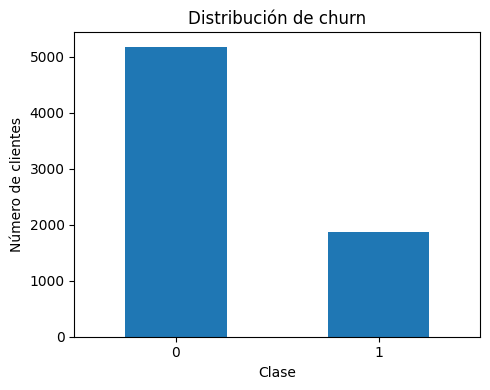

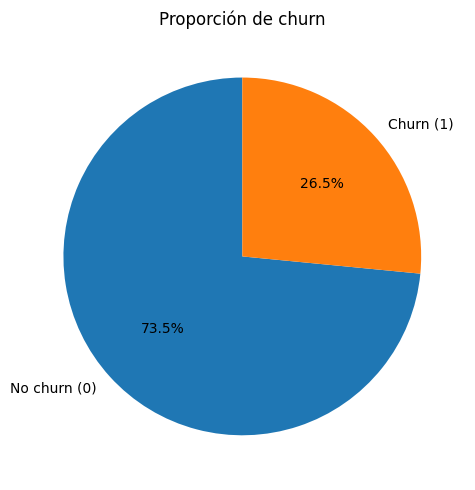

Tasa general de churn: 26.54%


In [21]:
import matplotlib.pyplot as plt

counts = df['churn_bin'].value_counts().sort_index()
labels = ['No churn (0)','Churn (1)'] if 0 in counts.index else [str(i) for i in counts.index]

# Barras
plt.figure(figsize=(5,4))
counts.plot(kind='bar')
plt.title('Distribución de churn')
plt.xlabel('Clase')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Pie
plt.figure(figsize=(5,5))
plt.pie(counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de churn')
plt.tight_layout()
plt.show()

print(f"Tasa general de churn: {counts.get(1,0) / counts.sum():.2%}")

## 3) Comparativa por churn — variables numéricas
Exploramos **cómo se distribuyen** variables numéricas entre clientes que **cancelaron** y los que **no**:
- **Resumen estadístico por grupo** (media, mediana, std).
- **Correlación punto-biserial** entre cada variable y `churn_bin` (para detectar señales).
- **Gráficos**: histogramas/boxplots por clase.

customer SeniorCitizen                  customer tenure         \
                            mean median       std            mean median   
churn_bin                                                                  
0                       0.128721    0.0  0.334923       37.569965   38.0   
1                       0.254682    0.0  0.435799       17.979133   10.0   

                     account Charges Monthly                     \
                 std                    mean  median        std   
churn_bin                                                         
0          24.113777               61.265124  64.425  31.092648   
1          19.531123               74.441332  79.650  24.666053   

          account Charges Total                       Cuentas_Diarias          \
                           mean   median          std            mean  median   
churn_bin                                                                       
0                   2555.344141  1683.60  2329.456984        2.042171  2.1475   
1                   1531.796094   703.55  1890.822994        2.481378  2.6550   

                     
                std  
churn_bin            
0          1.036422  
1          0.822202

,variable,r_pointbiserial,p_value,mean_overall
2,account Charges Monthly,0.193356,2.706646e-60,64.761692
4,Cuentas_Diarias,0.193356,2.706646e-60,2.158723
0,customer SeniorCitizen,0.150889,3.839860e-37,0.162147
3,account Charges Total,-0.199484,4.876866e-64,2283.300441
1,customer tenure,-0.352229,7.999058e-205,32.371149


,variable,r_pointbiserial,p_value,mean_overall
2,account Charges Monthly,0.193356,2.706646e-60,64.761692
4,Cuentas_Diarias,0.193356,2.706646e-60,2.158723
0,customer SeniorCitizen,0.150889,3.839860e-37,0.162147
3,account Charges Total,-0.199484,4.876866e-64,2283.300441
1,customer tenure,-0.352229,7.999058e-205,32.371149


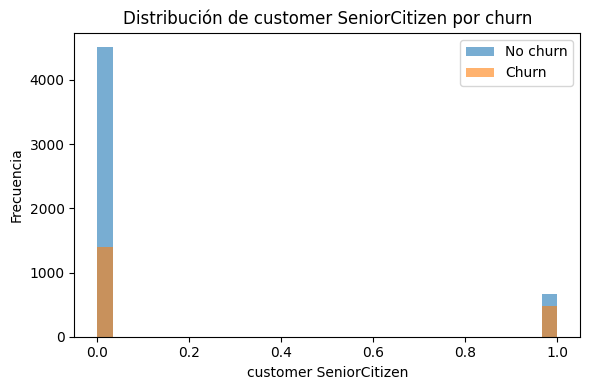

/tmp/ipython-input-1230949985.py:42: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



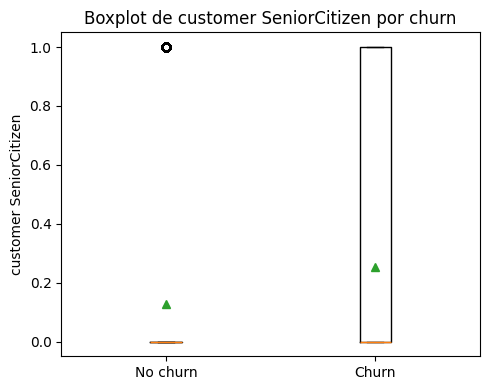

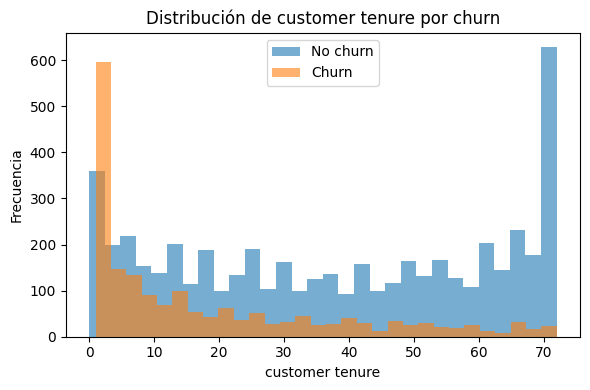

/tmp/ipython-input-1230949985.py:42: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



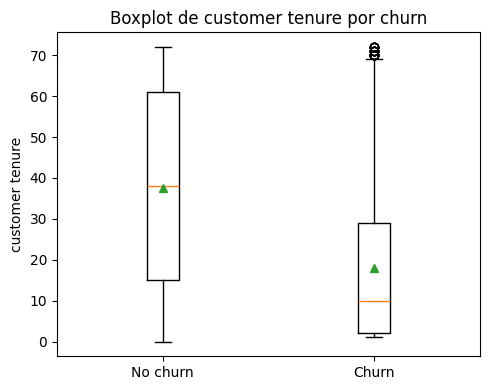

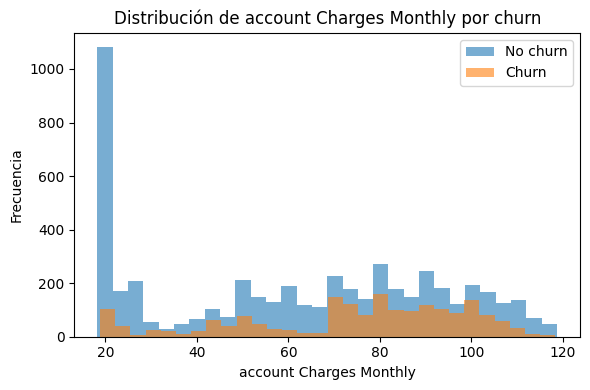

/tmp/ipython-input-1230949985.py:42: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



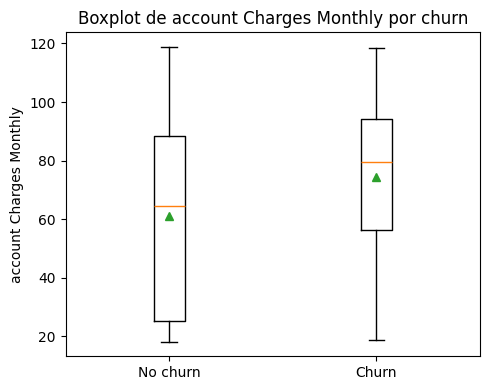

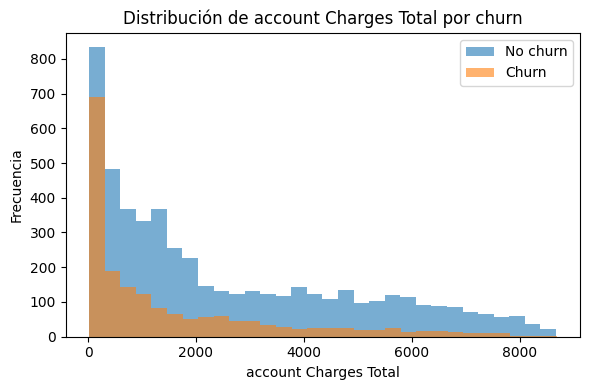

/tmp/ipython-input-1230949985.py:42: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



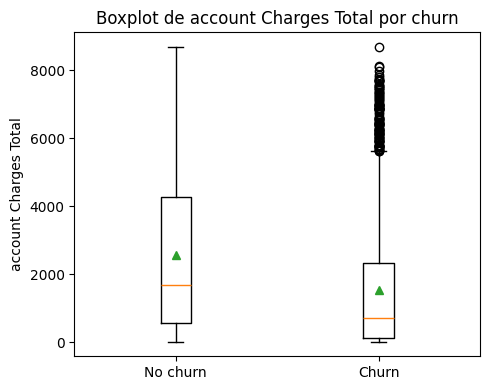

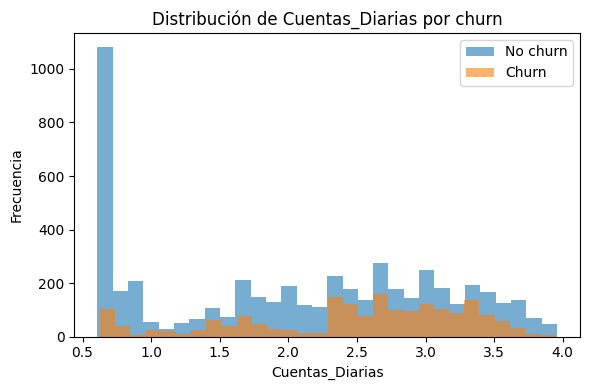

/tmp/ipython-input-1230949985.py:42: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



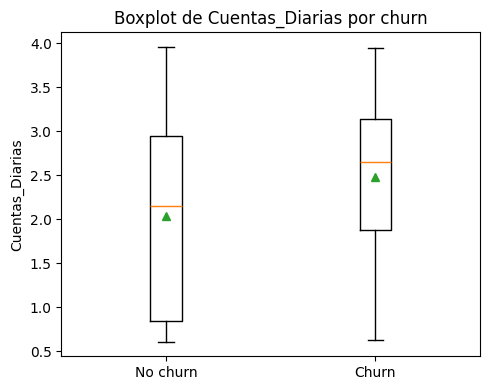

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Resumen por grupo
group_stats = df.groupby('churn_bin')[num_cols].agg(['mean','median','std'])
display(group_stats)

# Correlación punto-biserial (churn_bin vs numéricas)
corr_rows = []
y = df['churn_bin'].astype(float).values
for col in num_cols:
    x = df[col].astype(float).values
    mask = ~np.isnan(x) & ~np.isnan(y)
    if mask.sum() > 2 and np.unique(y[mask]).size > 1:
        r, p = pointbiserialr(y[mask], x[mask])
        corr_rows.append((col, r, p, np.nanmean(x[mask])))
corr_df = pd.DataFrame(corr_rows, columns=['variable','r_pointbiserial','p_value','mean_overall']).sort_values('r_pointbiserial', ascending=False)
display(corr_df.head(10))
display(corr_df.tail(10))

# Gráficos por variable (histogramas y boxplots)
# Nota: para notebooks grandes, limita a las primeras 6 variables para no saturar
plot_cols = num_cols[:6]

for col in plot_cols:
    # Hist por clase
    plt.figure(figsize=(6,4))
    df[df['churn_bin']==0][col].plot(kind='hist', alpha=0.6, bins=30, label='No churn')
    df[df['churn_bin']==1][col].plot(kind='hist', alpha=0.6, bins=30, label='Churn')
    plt.title(f'Distribución de {col} por churn')
    plt.xlabel(col); plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot por clase
    plt.figure(figsize=(5,4))
    data0 = df[df['churn_bin']==0][col].dropna()
    data1 = df[df['churn_bin']==1][col].dropna()
    plt.boxplot([data0, data1], labels=['No churn','Churn'], showmeans=True)
    plt.title(f'Boxplot de {col} por churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## 4) Informe final
La siguiente celda genera un **informe resumido** dentro del notebook con:
- **Introducción**
- **Limpieza y tratamiento de datos** (resumen)
- **Análisis exploratorio de datos**
- **Conclusiones e insights**
- **Recomendaciones**

In [26]:
import pandas as pd
import numpy as np
from io import StringIO

def summarize_report(df, num_cols):
    total = len(df)
    churn_rate = df['churn_bin'].mean()
    missing_any = df.isna().sum().sum()
    num_missing = df[num_cols].isna().sum().sort_values(ascending=False).head(5)

    # Top correlaciones
    try:
        from scipy.stats import pointbiserialr
        rows = []
        y = df['churn_bin'].astype(float).values
        for col in num_cols:
            x = df[col].astype(float).values
            mask = ~np.isnan(x) & ~np.isnan(y)
            if mask.sum() > 2 and np.unique(y[mask]).size > 1:
                r, p = pointbiserialr(y[mask], x[mask])
                rows.append((col, r, p))
        corr_df = pd.DataFrame(rows, columns=['variable','r','p']).sort_values('r', ascending=False)
        top_pos = corr_df.head(3)
        top_neg = corr_df.tail(3)
    except Exception:
        top_pos = pd.DataFrame(columns=['variable','r','p'])
        top_neg = pd.DataFrame(columns=['variable','r','p'])

    buf = StringIO()
    buf.write("# Informe — Evasión de clientes (Churn)\n\n")
    buf.write("## Introducción\n")
    buf.write("""El objetivo de este análisis es entender los factores que explican la **evasión de clientes (churn)** en la base de TelecomX LATAM, cuantificando la tasa de churn y explorando patrones en variables numéricas.

""")

    buf.write("## Limpieza y Tratamiento de Datos (resumen)\n")
    buf.write("- Detección automática del DataFrame con columna `churn` y conversión a binario (`churn_bin`).\n")
    buf.write("- Revisión de nulos y preparación mínima para análisis descriptivo.\n\n")

    buf.write("## Análisis Exploratorio de Datos\n")
    buf.write(f"- Tamaño del dataset: **{total:,}** registros.\n")
    buf.write(f"- Tasa general de churn: **{churn_rate:.2%}**.\n")
    if missing_any > 0:
        buf.write(f"- Valores faltantes totales (todas las columnas): **{missing_any:,}**.\n")
        if len(num_missing) > 0:
            buf.write(f"- Columnas numéricas con más nulos (top 5):\n")
            for idx, val in num_missing.items():
                buf.write(f"  - {idx}: {int(val):,} nulos\n")
    else:
        buf.write("- No se detectaron valores nulos.\n")

    if len(top_pos) > 0:
        buf.write("\n**Variables con mayor correlación positiva con churn (top 3):**\n")
        for _, r in top_pos.iterrows():
            buf.write(f"- {r['variable']}: r≈{r['r']:.3f} (p≈{r['p']:.3g})\n")
    if len(top_neg) > 0:
        buf.write("\n**Variables con mayor correlación negativa con churn (top 3):**\n")
        for _, r in top_neg.iterrows():
            buf.write(f"- {r['variable']}: r≈{r['r']:.3f} (p≈{r['p']:.3g})\n")

    buf.write("\n## Conclusiones e Insights\n")
    buf.write("- La tasa de churn provee una referencia para priorizar iniciativas de retención.\n")
    buf.write("- Las variables numéricas destacadas por correlación sugieren posibles **drivers de evasión** que deben validarse con modelos y análisis causales.\n")
    buf.write("- Las diferencias de distribución entre clientes que se fueron y los que permanecen ayudan a identificar **umbrales de riesgo**.\n\n")

    buf.write("## Recomendaciones\n")
    buf.write("- Diseñar **segmentos de riesgo** usando las variables con mayor señal y monitorear su evolución.\n")
    buf.write("- Implementar **intervenciones proactivas** (ofertas, soporte, educación) para clientes en umbrales críticos.\n")
    buf.write("- Profundizar con **modelos predictivos** (e.g., regresión logística, árboles) y pruebas A/B para validar acciones.\n")
    buf.write("- Revisar **calidad de datos** en columnas con alta tasa de nulos; estandarizar unidades y formatos.\n")

    return buf.getvalue()

report_md = summarize_report(df, num_cols)
from IPython.display import Markdown, display
display(Markdown(report_md))

# Informe — Evasión de clientes (Churn)

## Introducción
El objetivo de este análisis es entender los factores que explican la **evasión de clientes (churn)** en la base de TelecomX LATAM, cuantificando la tasa de churn y explorando patrones en variables numéricas.

## Limpieza y Tratamiento de Datos (resumen)
- Detección automática del DataFrame con columna `churn` y conversión a binario (`churn_bin`).
- Revisión de nulos y preparación mínima para análisis descriptivo.

## Análisis Exploratorio de Datos
- Tamaño del dataset: **7,043** registros.
- Tasa general de churn: **26.54%**.
- Valores faltantes totales (todas las columnas): **11**.
- Columnas numéricas con más nulos (top 5):
  - account Charges Total: 11 nulos
  - customer SeniorCitizen: 0 nulos
  - customer tenure: 0 nulos
  - account Charges Monthly: 0 nulos
  - Cuentas_Diarias: 0 nulos

**Variables con mayor correlación positiva con churn (top 3):**
- account Charges Monthly: r≈0.193 (p≈2.71e-60)
- Cuentas_Diarias: r≈0.193 (p≈2.71e-60)
- customer SeniorCitizen: r≈0.151 (p≈3.84e-37)

**Variables con mayor correlación negativa con churn (top 3):**
- customer SeniorCitizen: r≈0.151 (p≈3.84e-37)
- account Charges Total: r≈-0.199 (p≈4.88e-64)
- customer tenure: r≈-0.352 (p≈8e-205)

## Conclusiones e Insights
- La tasa de churn provee una referencia para priorizar iniciativas de retención.
- Las variables numéricas destacadas por correlación sugieren posibles **drivers de evasión** que deben validarse con modelos y análisis causales.
- Las diferencias de distribución entre clientes que se fueron y los que permanecen ayudan a identificar **umbrales de riesgo**.

## Recomendaciones
- Diseñar **segmentos de riesgo** usando las variables con mayor señal y monitorear su evolución.
- Implementar **intervenciones proactivas** (ofertas, soporte, educación) para clientes en umbrales críticos.
- Profundizar con **modelos predictivos** (e.g., regresión logística, árboles) y pruebas A/B para validar acciones.
- Revisar **calidad de datos** en columnas con alta tasa de nulos; estandarizar unidades y formatos.
